# Basic Plotting with matplotlib

You can show matplotlib figures directly in the notebook by using the `%matplotlib notebook` and `%matplotlib inline` magic commands. 

`%matplotlib notebook` provides an interactive environment.

- The architecture to accomplish this is logically separated into three layers, which can be viewed as a stack. Each layer that sits above another layer knows how to talk to the layer below it, but the lower layer is not aware of the layers above it. The three layers from bottom to top are: backend, artist, and scripting.

**Figure**:<br>
The whole figure. The figure keeps track of all the child Axes, a smattering of 'special' artists (titles, figure legends, etc), and the canvas. (Don't worry too much about the canvas, it is crucial as it is the object that actually does the drawing to get you your plot, but as the user it is more-or-less invisible to you). A figure can contain any number of Axes, but will typically have at least one.`It's convenient to create the axes together with the figure, but you can also add axes later on, allowing for more complex axes layouts.`<br>
    fig = plt.figure()  # an empty figure with no Axes<br>
    fig, ax = plt.subplots()  # a figure with a single Axes<br>
    fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes<br>

**Axes**:<br>
This is what you think of as 'a plot', it is the region of the image with the data space. A given figure can contain many Axes, but a given Axes object can only be in one Figure. The Axes contains two (or three in the case of 3D) Axis objects (be aware of the difference between Axes and Axis) which take care of the data limits (the data limits can also be controlled via the axes.Axes.set_xlim() and axes.Axes.set_ylim() methods). Each Axes has a title (set via set_title()), an x-label (set via set_xlabel()), and a y-label set via set_ylabel()).

The Axes class and its member functions are the primary entry point to working with the OO interface.

**Axis**<br>
These are the number-line-like objects. They take care of setting the graph limits and generating the ticks (the marks on the axis) and ticklabels (strings labeling the ticks). The location of the ticks is determined by a Locator object and the ticklabel strings are formatted by a Formatter. The combination of the correct Locator and Formatter gives very fine control over the tick locations and labels.

**Artist**<br>
Basically everything you can see on the figure is an artist (even the Figure, Axes, and Axis objects). This includes Text objects, Line2D objects, collections objects, Patch objects ... (you get the idea). When the figure is rendered, all of the artists are drawn to the canvas. Most Artists are tied to an Axes; such an Artist cannot be shared by multiple Axes, or moved from one to another.



In [2]:
%matplotlib notebook

In [3]:
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

### The object-oriented interface and the pyplot interface
As noted above, there are essentially two ways to use Matplotlib:

- Explicitly create figures and axes, and call methods on them (the "object-oriented (OO) style").
- Rely on pyplot to automatically create and manage the figures and axes, and use pyplot functions for plotting.

In [4]:
import matplotlib.pyplot as plt              #matplotlib.pyplot is a state-based interface to matplotlib
plt.plot?

So one can do (OO-style)

<IPython.core.display.Javascript object>


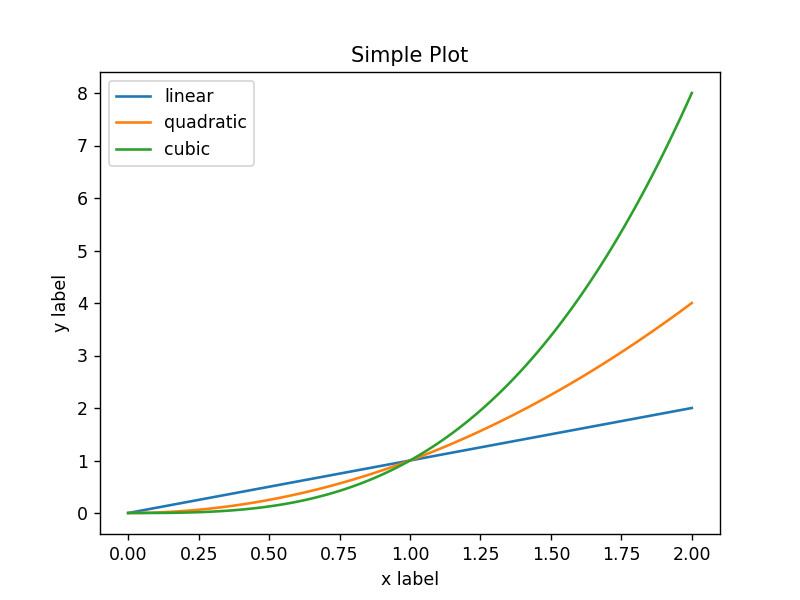

In [5]:
import numpy as np
x = np.linspace(0, 2, 100)

# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

or (pyplot-style)

<IPython.core.display.Javascript object>


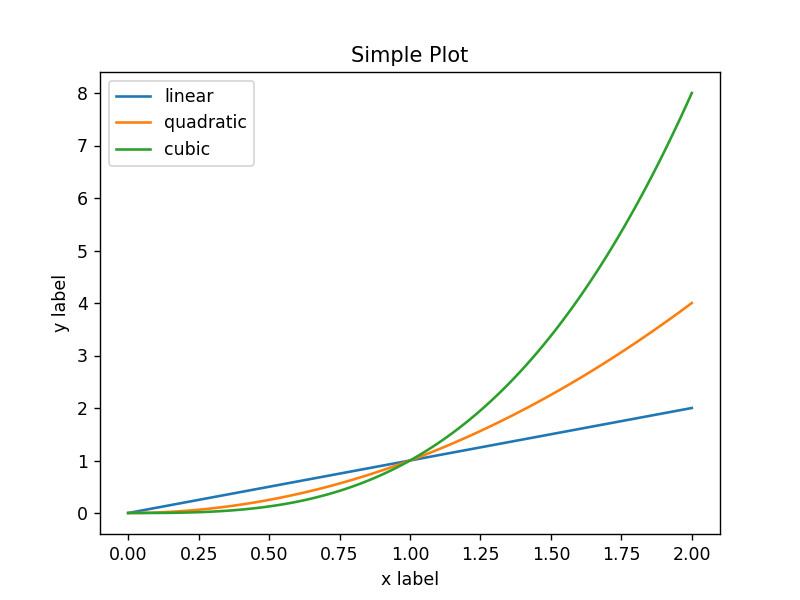

In [6]:
x = np.linspace(0, 2, 100)

plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

<IPython.core.display.Javascript object>


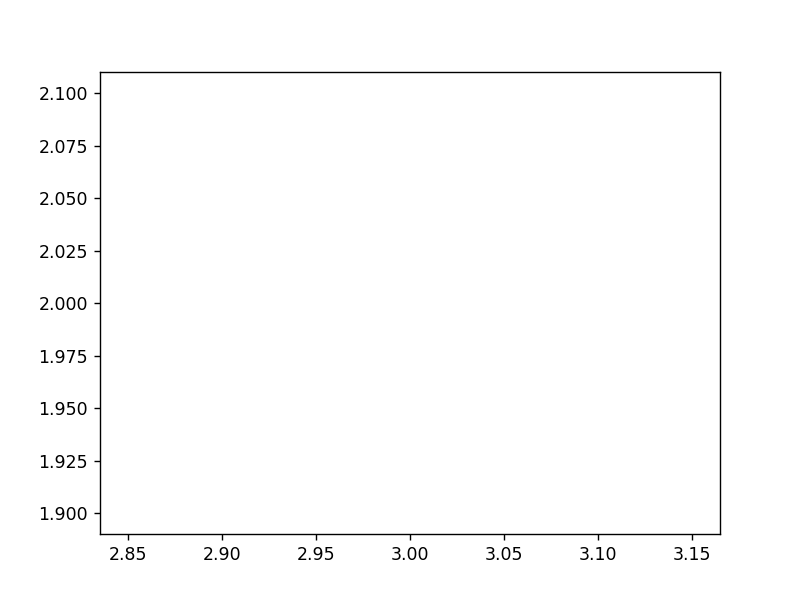

In [7]:
# because the default is the line style '-', 
# nothing will be shown if we only pass in one point (3,2)
plt.plot(3, 2)

<IPython.core.display.Javascript object>


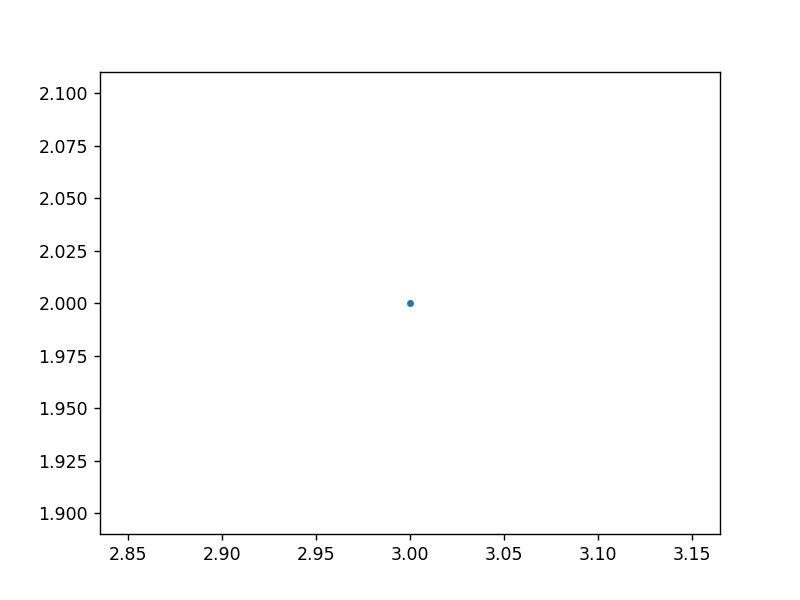

In [8]:
# we can pass in '.' to plt.plot to indicate that we want
# the point (3,2) to be indicated with a marker '.'
plt.plot(3, 2, '.')

Let's see how to make a plot without using the scripting layer.

### Backends
A lot of documentation on the website and in the mailing lists refers to the "backend" and many new users are confused by this term. Matplotlib targets many different use cases and output formats.<br>
To support all of these use cases, matplotlib can target different outputs, and each of these capabilities is called a backend; the "frontend" is the user facing code, i.e., the plotting code, whereas the "backend" does all the hard work behind-the-scenes to make the figure. There are two types of backends: user interface backends (for use in pygtk, wxpython, tkinter, qt4, or macosx; also referred to as "interactive backends") and hardcopy backends to make image files (PNG, SVG, PDF, PS; also referred to as "non-interactive backends").

Selecting a backend:-<br>
There are three ways to configure your backend:
  - The rcParams["backend"] (default: 'agg') parameter in your matplotlibrc file
  - The MPLBACKEND environment variable
  - The function matplotlib.use()

In [9]:
# First let's set the backend without using mpl.use() from the scripting layer
from matplotlib.backends.backend_agg import FigureCanvasAgg
from matplotlib.figure import Figure

# create a new figure
fig = Figure()

# associate fig with the backend
canvas = FigureCanvasAgg(fig)

# add a subplot to the fig
ax = fig.add_subplot(111)

# plot the point (3,2)
ax.plot(3, 2, '.')

# save the figure to test.png
# you can see this figure in your Jupyter workspace afterwards by going to
# https://hub.coursera-notebooks.org/
canvas.print_png('test.png')

We can use html cell magic to display the image.

In [10]:
%%html
<img src='test.png' />

<IPython.core.display.Javascript object>


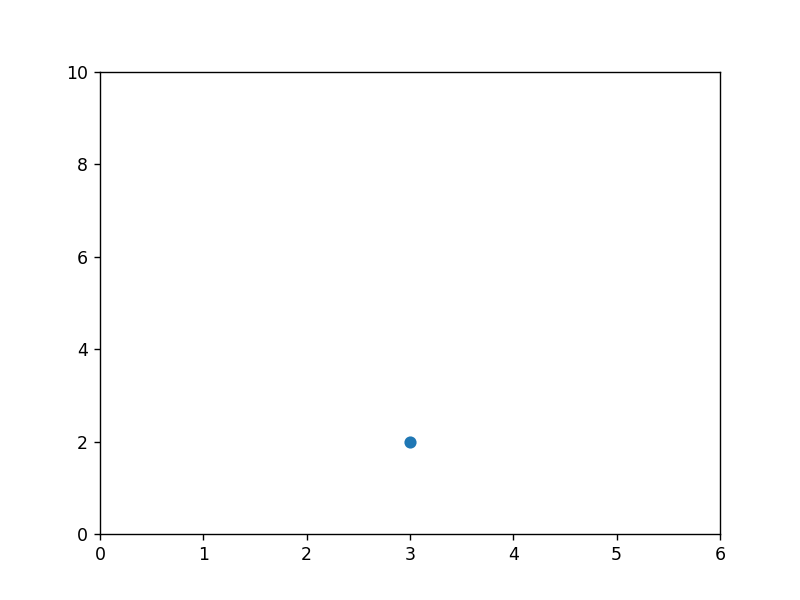

[0, 6, 0, 10]

In [11]:
# create a new figure
plt.figure()

# plot the point (3,2) using the circle marker
plt.plot(3, 2, 'o')

# get the current axes
ax = plt.gca()

# Set axis properties [xmin, xmax, ymin, ymax]
ax.axis([0,6,0,10])

<IPython.core.display.Javascript object>


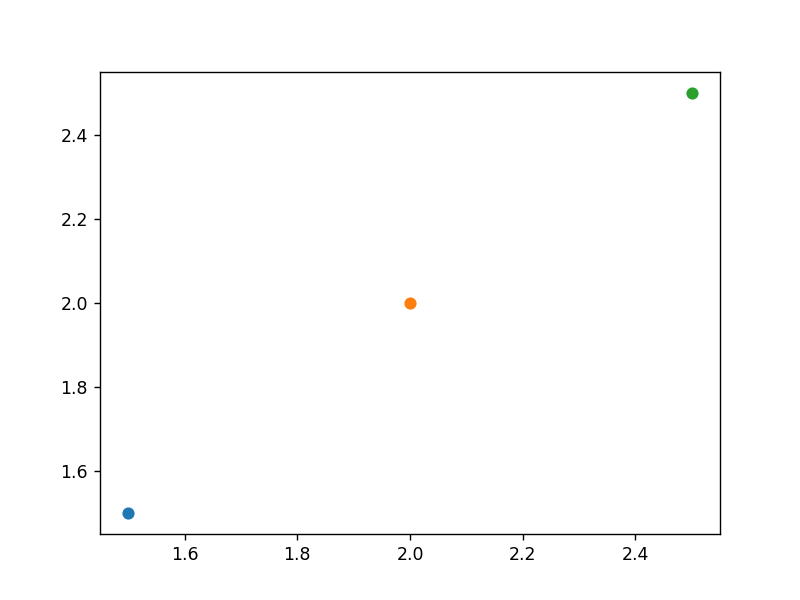

In [12]:
# create a new figure
plt.figure()

# plot the point (1.5, 1.5) using the circle marker
plt.plot(1.5, 1.5, 'o')
# plot the point (2, 2) using the circle marker
plt.plot(2, 2, 'o')
# plot the point (2.5, 2.5) using the circle marker
plt.plot(2.5, 2.5, 'o')

<IPython.core.display.Javascript object>


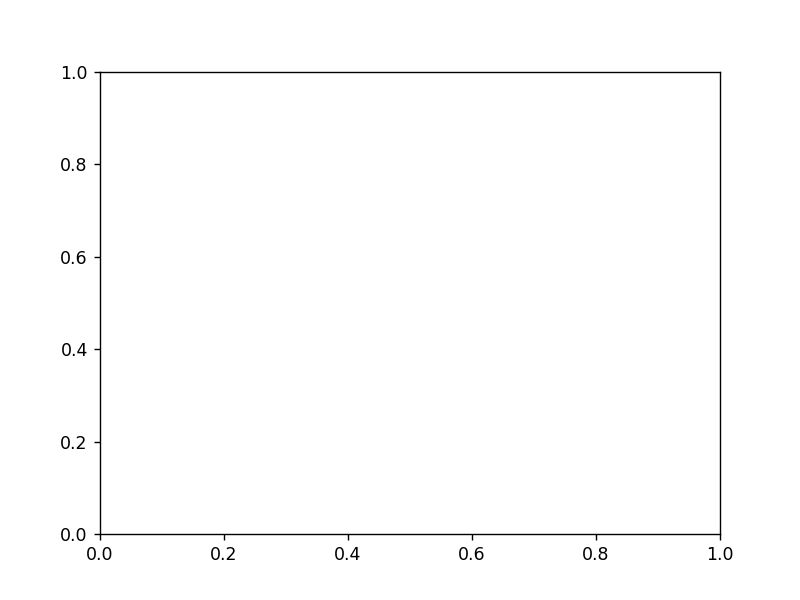

In [13]:
# get current axes
ax = plt.gca()
# get all the child objects the axes contains
ax.get_children()

# Scatterplots

<IPython.core.display.Javascript object>


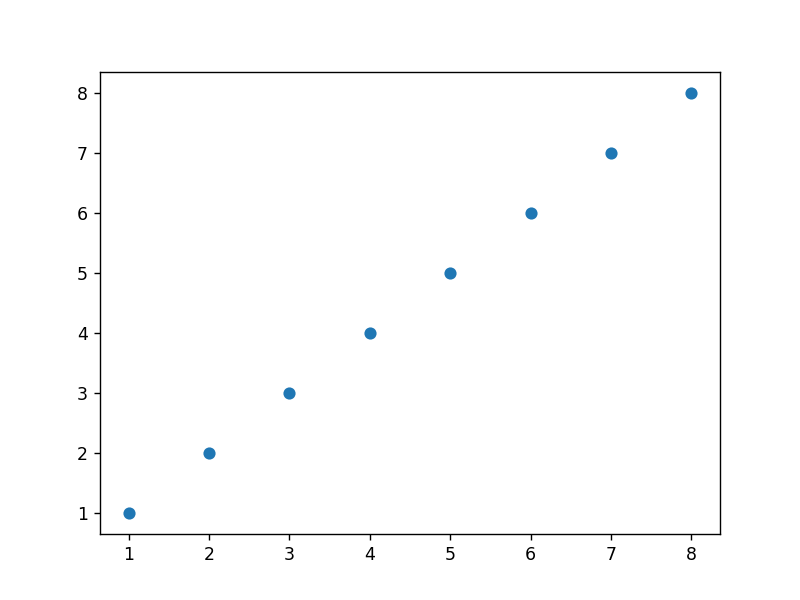

In [14]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

plt.figure()
plt.scatter(x, y) # similar to plt.plot(x, y, '.'), but the underlying child objects in the axes are not Line2D

<IPython.core.display.Javascript object>


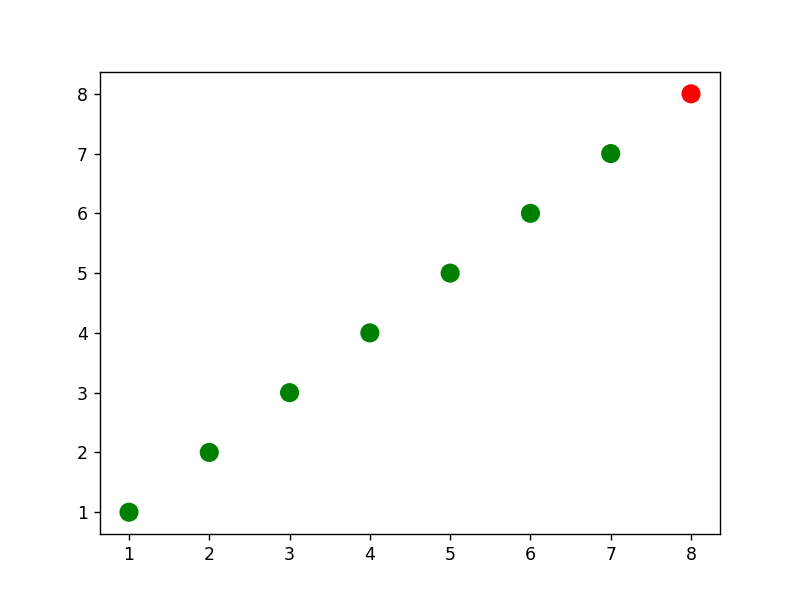

In [18]:
import numpy as np

x = np.array([1,2,3,4,5,6,7,8])
y = x

# create a list of colors for each point to have
# ['green', 'green', 'green', 'green', 'green', 'green', 'green', 'red']
colors = ['green']*(len(x)-1)
colors.append('red')

plt.figure()

# plot the point with size 100 and chosen colors
plt.scatter(x, y, s=100, c=colors)

In [25]:
# convert the two lists into a list of pairwise tuples
zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])

print(list(zip_generator))
# the above prints:
# [(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]

zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# The single star * unpacks a collection into positional arguments
print(*zip_generator)
# the above prints:
# (1, 6) (2, 7) (3, 8) (4, 9) (5, 10)

[(1, 6), (2, 7), (3, 8), (4, 9), (5, 10)]
(1, 6) (2, 7) (3, 8) (4, 9) (5, 10)


In [26]:
# use zip to convert 5 tuples with 2 elements each to 2 tuples with 5 elements each
print(list(zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))))
# the above prints:
# [(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]


zip_generator = zip([1,2,3,4,5], [6,7,8,9,10])
# let's turn the data back into 2 lists
x, y = zip(*zip_generator) # This is like calling zip((1, 6), (2, 7), (3, 8), (4, 9), (5, 10))
print(x)
print(y)
# the above prints:
# (1, 2, 3, 4, 5)
# (6, 7, 8, 9, 10)

[(1, 2, 3, 4, 5), (6, 7, 8, 9, 10)]
(1, 2, 3, 4, 5)
(6, 7, 8, 9, 10)


<IPython.core.display.Javascript object>


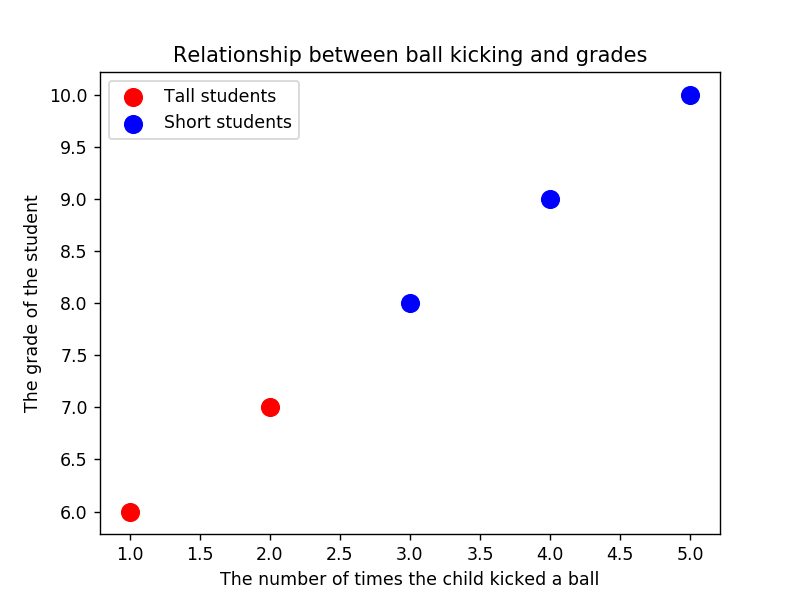

In [34]:
plt.figure()
# plot a data series 'Tall students' in red using the first two elements of x and y
plt.scatter(x[:2], y[:2], s=100, c='red', label='Tall students')
# plot a second data series 'Short students' in blue using the last three elements of x and y 
plt.scatter(x[2:], y[2:], s=100, c='blue', label='Short students')

In [35]:
# add a label to the x axis
plt.xlabel('The number of times the child kicked a ball')
# add a label to the y axis
plt.ylabel('The grade of the student')
# add a title
plt.title('Relationship between ball kicking and grades')

In [36]:
# add a legend (uses the labels from plt.scatter)
plt.legend()

In [38]:
# add the legend to loc=4 (the lower right hand corner), also gets rid of the frame and adds a title
plt.legend(loc=4, frameon=False, title='Legend')

In [39]:
# get children from current axes (the legend is the second to last item in this list)
plt.gca().get_children()

In [40]:
# get the legend from the current axes
legend = plt.gca().get_children()[-2]

In [46]:
# you can use get_children to navigate through the child artists
legend.get_children()[0].get_children()[1].get_children()[0].get_children()

In [47]:
# import the artist class from matplotlib
from matplotlib.artist import Artist

def rec_gc(art, depth=0):
    if isinstance(art, Artist):
        # increase the depth for pretty printing
        print("  " * depth + str(art))
        for child in art.get_children():
            rec_gc(child, depth+2)

# Call this function on the legend artist to see what the legend is made up of
rec_gc(plt.legend())

Legend
            Text(0,0,'None')
                        Text(0,0,'Tall students')
                        Text(0,0,'Short students')
    FancyBboxPatch(0,0;1x1)


# Line Plots

<IPython.core.display.Javascript object>


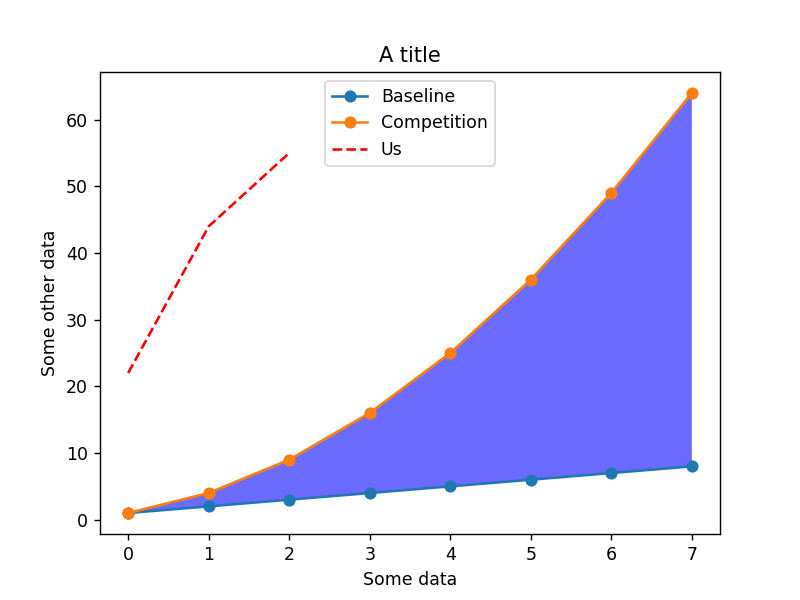

In [48]:
import numpy as np

linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2

plt.figure()
# plot the linear data and the exponential data
plt.plot(linear_data, '-o', exponential_data, '-o')

In [49]:
# plot another series with a dashed red line
plt.plot([22,44,55], '--r')

In [50]:
plt.xlabel('Some data')
plt.ylabel('Some other data')
plt.title('A title')
# add a legend with legend entries (because we didn't have labels when we plotted the data series)
plt.legend(['Baseline', 'Competition', 'Us'])

In [56]:
# fill the area between the linear data and exponential data
plt.gca().fill_between(range(len(linear_data)), 
                       linear_data, exponential_data, 
                       facecolor='blue', 
                       alpha=0.25)

Let's try working with dates!

<IPython.core.display.Javascript object>


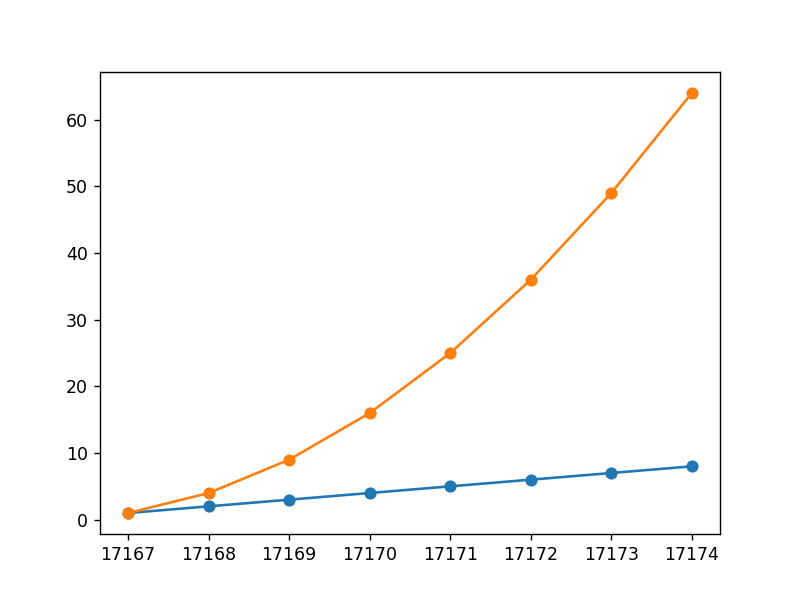

In [57]:
plt.figure()

observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')

plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

Let's try using pandas

<IPython.core.display.Javascript object>


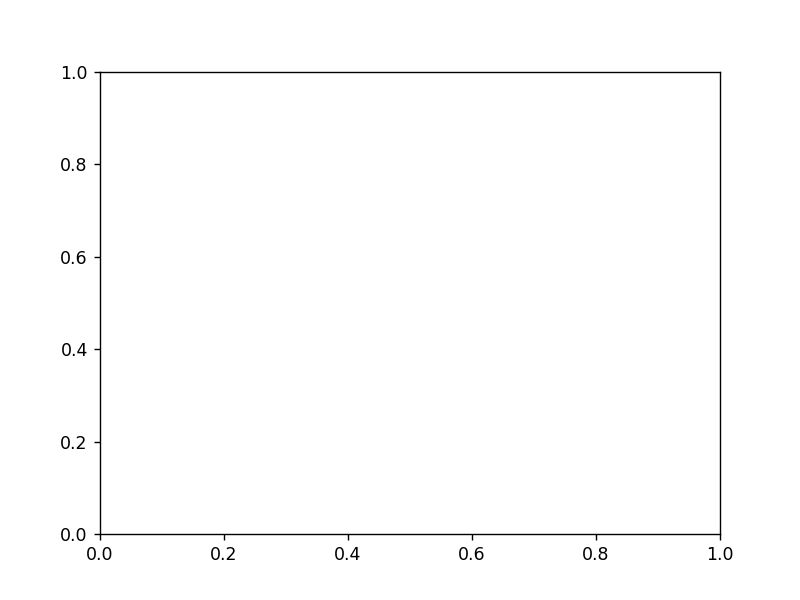

TypeError: object of type 'map' has no len()

In [58]:
import pandas as pd

plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = map(pd.to_datetime, observation_dates) # trying to plot a map will result in an error
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

<IPython.core.display.Javascript object>


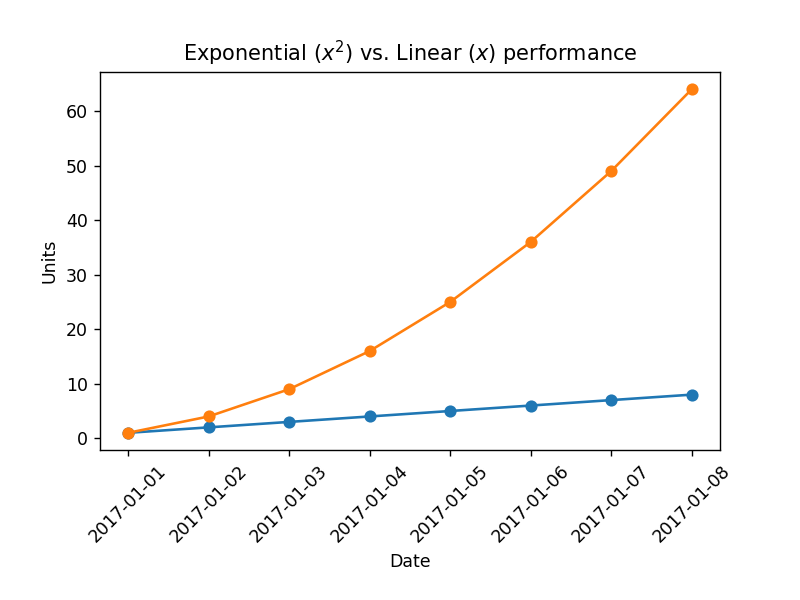

In [59]:
plt.figure()
observation_dates = np.arange('2017-01-01', '2017-01-09', dtype='datetime64[D]')
observation_dates = list(map(pd.to_datetime, observation_dates)) # convert the map to a list to get rid of the error
plt.plot(observation_dates, linear_data, '-o',  observation_dates, exponential_data, '-o')

In [60]:
x = plt.gca().xaxis

# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)

In [61]:
# adjust the subplot so the text doesn't run off the image
plt.subplots_adjust(bottom=0.25)

In [62]:
ax = plt.gca()
ax.set_xlabel('Date')
ax.set_ylabel('Units')
ax.set_title('Exponential vs. Linear performance')

In [63]:
# you can add mathematical expressions in any text element
ax.set_title("Exponential ($x^2$) vs. Linear ($x$) performance")

# Bar Charts

<IPython.core.display.Javascript object>


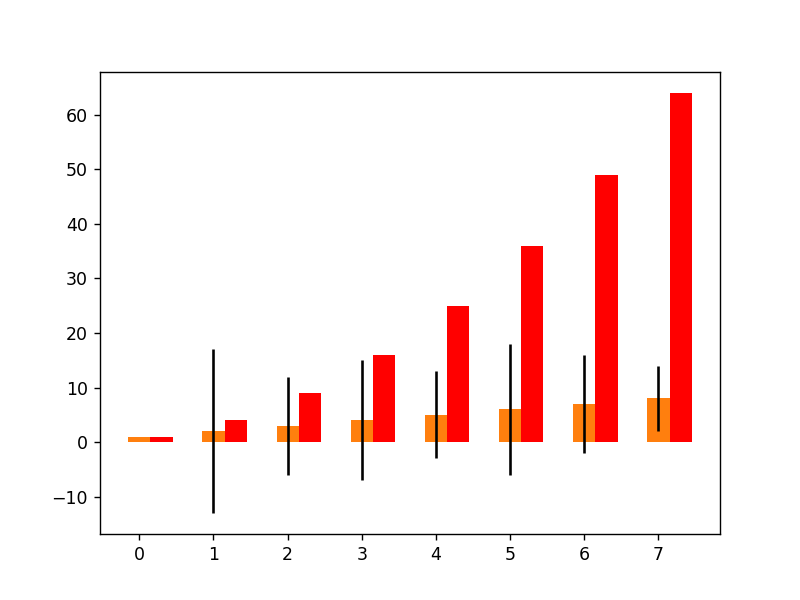

<Container object of 8 artists>

In [67]:
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3)

In [68]:
new_xvals = []

# plot another set of bars, adjusting the new xvals to make up for the first set of bars plotted
for item in xvals:
    new_xvals.append(item+0.3)

plt.bar(new_xvals, exponential_data, width = 0.3 ,color='red')

<Container object of 8 artists>

In [69]:
from random import randint
linear_err = [randint(0,15) for x in range(len(linear_data))] 

# This will plot a new set of bars with errorbars using the list of random error values
plt.bar(xvals, linear_data, width = 0.3, yerr=linear_err)

<Container object of 8 artists>

<IPython.core.display.Javascript object>


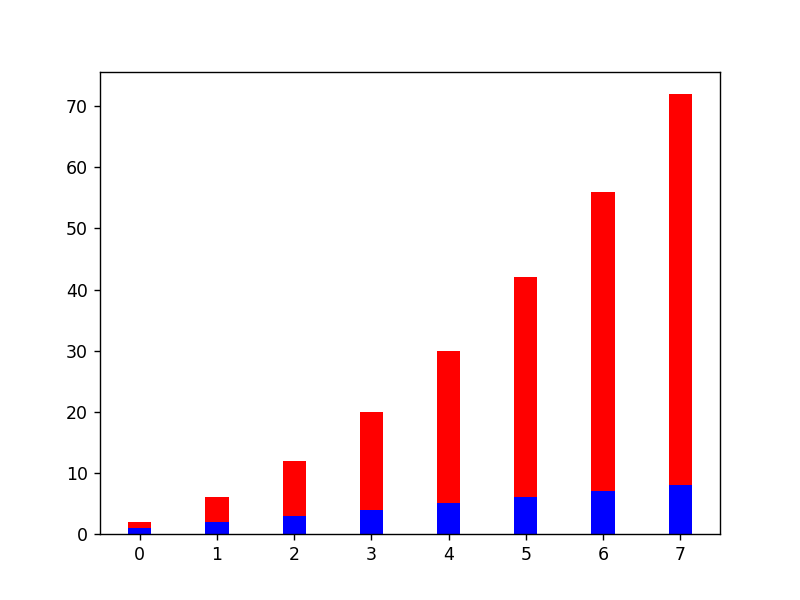

<Container object of 8 artists>

In [70]:
# stacked bar charts are also possible
plt.figure()
xvals = range(len(linear_data))
plt.bar(xvals, linear_data, width = 0.3, color='b')
plt.bar(xvals, exponential_data, width = 0.3, bottom=linear_data, color='r')

<IPython.core.display.Javascript object>


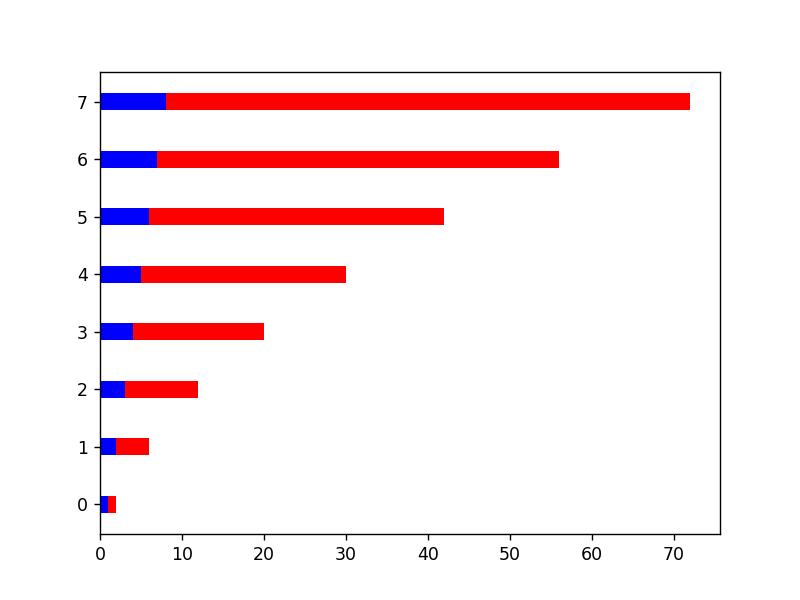

<Container object of 8 artists>

In [71]:
# or use barh for horizontal bar charts
plt.figure()
xvals = range(len(linear_data))
plt.barh(xvals, linear_data, height = 0.3, color='b')
plt.barh(xvals, exponential_data, height = 0.3, left=linear_data, color='r')